In [1]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

In [2]:
#load scraped data
job=pd.read_csv('data/job_data_cleaned.csv')

In [3]:
print(job.shape)
job.head()

(648, 27)


,avg_salary,log_avg_salary,same_state,company_age,python,excel,hadoop,spark,aws,tableau,...,Revenue,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,requirements_lem,Salary_Bins_binary
0,154,5.036953,1,27,0,0,0,0,1,0,...,13.0,173.0,117.0,141.0,3.0,7.0,31.0,13.0,Description The Senior Data Scientist respons...,1
1,154,5.036953,0,52,0,0,1,0,0,0,...,0.0,233.0,34.0,89.0,5.0,3.0,43.0,5.0,Secure Nation Ignite Future Join Information ...,1
2,154,5.036953,1,39,1,1,0,0,1,0,...,4.0,31.0,19.0,28.0,3.0,9.0,12.0,5.0,Overview Analysis Group largest international...,1
3,154,5.036953,0,20,1,1,0,0,1,0,...,4.0,184.0,118.0,15.0,6.0,3.0,16.0,14.0,JOB DESCRIPTION Do passion Data Machine Learn...,1
4,154,5.036953,1,22,1,1,0,0,0,0,...,13.0,18.0,117.0,141.0,7.0,2.0,2.0,5.0,Data Scientist Affinity Solutions Marketing C...,1


In [4]:
job.duplicated().sum()

1

In [5]:
job.drop_duplicates(inplace=True)

In [6]:
job.columns

Index(['avg_salary', 'log_avg_salary', 'same_state', 'company_age', 'python',
       'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data',
       'len_requirement', 'words_requirement', 'Rating', 'Salary_Bins',
       'job_title_simp2', 'short_title', 'Revenue', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'requirements_lem', 'Salary_Bins_binary'],
      dtype='object')

In [7]:
X = job['requirements_lem']
y = job['log_avg_salary']
y_cat=job['Salary_Bins_binary'].astype('category')

In [8]:
X.head()

0     Description The Senior Data Scientist respons...
1     Secure Nation Ignite Future Join Information ...
2     Overview Analysis Group largest international...
3     JOB DESCRIPTION Do passion Data Machine Learn...
4     Data Scientist Affinity Solutions Marketing C...
Name: requirements_lem, dtype: object

In [9]:
X.duplicated().sum()

166

In [10]:
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
643    False
644    False
645    False
646    False
647     True
Name: requirements_lem, Length: 647, dtype: bool

In [11]:
y.value_counts()

4.521789    41
4.912655    40
4.736198    40
4.672829    38
4.663439    38
4.634729    31
4.744932    31
4.653960    31
5.036953    29
4.595120    27
4.330733    22
4.890349    21
4.997212    21
4.787492    21
5.099866    21
5.602119    21
5.081404    21
3.761200    20
4.488636    20
4.812184    20
4.727388    20
5.209486    20
5.220356    19
4.574711    18
4.897840    16
Name: log_avg_salary, dtype: int64

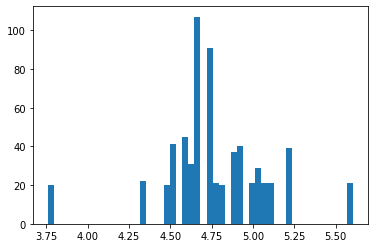

In [12]:
plt.hist(y, bins=50);

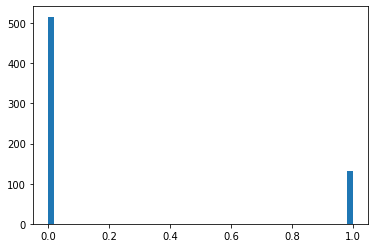

In [13]:
plt.hist(y_cat, bins=50);

# Baseline Model

In [158]:
job['Salary_Bins_binary'].value_counts(normalize=True)

0    0.797527
1    0.202473
Name: Salary_Bins_binary, dtype: float64

# Train test split

In [14]:
# Split our data into train and test data. We will stratify during the split to ensure that the train and test sets 
# contains the same percentage of samplesto avoid imbalanced classes.
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=42, test_size=0.25) # account for slight class unbalanced 

# Baseline Feature Modelling

In [15]:
# Vectorizer and Model imports:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier, RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier, AdaBoostClassifier, AdaBoostRegressor,VotingClassifier, VotingRegressor
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, plot_roc_curve, roc_auc_score,accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVR,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
job.columns

Index(['avg_salary', 'log_avg_salary', 'same_state', 'company_age', 'python',
       'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data',
       'len_requirement', 'words_requirement', 'Rating', 'Salary_Bins',
       'job_title_simp2', 'short_title', 'Revenue', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'requirements_lem', 'Salary_Bins_binary'],
      dtype='object')

In [17]:
#X_base=job.drop(columns=['requirements_lem','avg_salary', 'log_avg_salary','Salary_Bins'])
col_base=['Industry','Sector','Revenue']
X_base=job[col_base]
y_base=job['Salary_Bins_binary']

In [18]:
X_train_b,X_test_b,y_train_b,y_test_b = train_test_split(X_base,y_base,
                                                 random_state=42, test_size=0.25) # account for slight class unbalanced 

In [19]:
# Function to run model -- input vectorizer and model
def model_run_classification_base(mod, mod_params={}, grid_search=False):
    
    results = {}
    
    pipe = Pipeline([
            (mod, models_c[mod])
            ])

    if grid_search:
   
        gs = GridSearchCV(pipe, param_grid = {**mod_params}, verbose=3, n_jobs=-1)
        gs.fit(X_train_b, y_train_b)
        pipe = gs
      
    else:
        pipe.fit(X_train_b, y_train_b)

    # Retrieve metrics
    results['model'] = mod
    results['train'] = pipe.score(X_train_b, y_train_b)
    results['test'] = pipe.score(X_test_b, y_test_b)
    predictions = pipe.predict(X_test_b)
    results['MSE'] = mean_squared_error(y_test_b, predictions,squared=False)
    results['accuracy']=accuracy_score(y_test_b, predictions)
    if grid_search:
        tuning_list.append(results)
        print('### BEST PARAMS ###')
        display(pipe.best_params_)
        
    else:
        eval_list_c_b.append(results)
    # Generate confusion matrix.
    class_names = ["0-150K","150K-300K"]
    cm = confusion_matrix(y_test_b, predictions)  # True vs Predicted values.
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
    fig, ax = plt.subplots(figsize=(15,15))
    disp.plot(ax=ax);
    print('### METRICS ###')
    display(results)
    return pipe

In [20]:
# Instiantiate classification models
models_c = {'knn': KNeighborsClassifier(n_neighbors=3),
          'rfc': RandomForestClassifier(random_state=42),
          'gbc': GradientBoostingClassifier(random_state=42),
          'etc': ExtraTreesClassifier(random_state=42),
          'adac': AdaBoostClassifier(random_state=42),
          'svc': SVC()}

In [21]:
eval_list_c_b=[]

### METRICS ###


{'model': 'knn',
 'train': 0.8,
 'test': 0.7716049382716049,
 'MSE': 0.4779069592801459,
 'accuracy': 0.7716049382716049}

Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=3))])

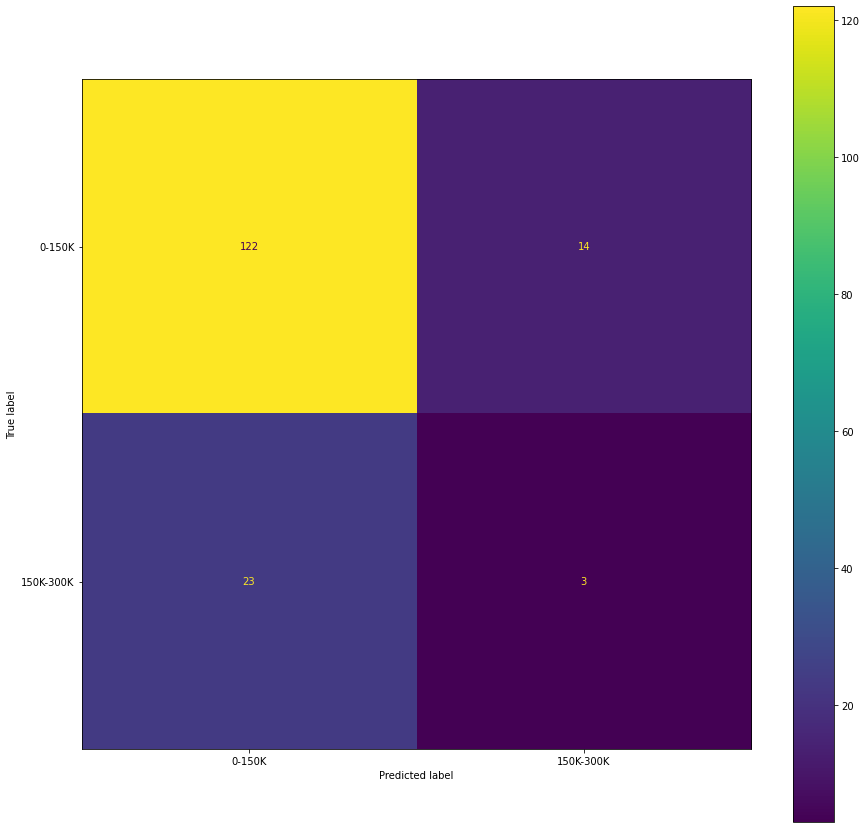

In [22]:
model_run_classification_base('knn')

In [23]:
pd.DataFrame(eval_list_c_b)

,model,train,test,MSE,accuracy
0,knn,0.8,0.771605,0.477907,0.771605


# NLP Modelling

In [24]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# creating my own custom stopwords
custom_stopwords=['\n']

In [25]:
#adding the english stopwords to my custom stopwords+
custom_stopwords.extend(ENGLISH_STOP_WORDS)

In [26]:
cv = CountVectorizer(stop_words=custom_stopwords)
tvec = TfidfVectorizer(stop_words=custom_stopwords)
hv= HashingVectorizer(stop_words=custom_stopwords)

In [27]:
# Instantiate vectorizers
vectorizers = {'cvec': cv,
               'tvec': tvec,
               'hv': hv}

In [28]:
# Instiantiate regression models
models = {'lr': LinearRegression(),
          'rf': RandomForestRegressor(random_state=42),
          'gb': GradientBoostingRegressor(random_state=42),
          'et': ExtraTreesRegressor(random_state=42),
          'ada': AdaBoostRegressor(random_state=42),
          'svr': SVR()}

In [29]:
# Instiantiate classification models
models_c = {'knn': KNeighborsClassifier(n_neighbors=3),
          'rfc': RandomForestClassifier(random_state=42),
          'gbc': GradientBoostingClassifier(random_state=42),
          'etc': ExtraTreesClassifier(random_state=42),
          'adac': AdaBoostClassifier(random_state=42),
          'svc': SVC()}

In [30]:
# Function to run model -- input vectorizer and model
def model_run(vec_name,vec, mod, vec_params={}, mod_params={}, grid_search=False):
    
    results = {}
    
    pipe = Pipeline([
            (mod, models[mod])
            ])
    X_train_vec =vec.fit_transform(X_train)
    X_test_vec =vec.transform(X_test)
    X_train_df=pd.DataFrame(X_train_vec.todense(),columns=vec.get_feature_names())
    X_test_df=pd.DataFrame(X_test_vec.todense(),columns=vec.get_feature_names())
    if grid_search:
   
        gs = GridSearchCV(vec,pipe, param_grid = {**vec_params, **mod_params}, verbose=3, n_jobs=-1)
        gs.fit(X_train_df, y_train)
        pipe = gs
      
    else:
        pipe.fit(X_train_df, y_train)

    # Retrieve metrics
    results['model'] = mod
    results['vectorizer'] = vec_name
    results['train'] = pipe.score(X_train_df, y_train)
    results['test'] = pipe.score(X_test_df, y_test)
    predictions = pipe.predict(X_test_df)
    results['MSE'] = mean_squared_error(y_test, predictions,squared=False)

    if grid_search:
        tuning_list.append(results)
        print('### BEST PARAMS ###')
        display(pipe.best_params_)
        
    else:
        eval_list.append(results)
    
    print('### METRICS ###')
    display(results)
    return pipe

In [31]:
from sklearn.metrics import mean_squared_error

# Model testing with TVEC and CVEC

In [32]:
# Create list to store model testing results
eval_list = []

In [33]:
model_run('cvec',cv, 'lr')

### METRICS ###


{'model': 'lr',
 'vectorizer': 'cvec',
 'train': 0.6220889391919603,
 'test': -4.2329510765368214e+26,
 'MSE': 5343171052771.246}

Pipeline(steps=[('lr', LinearRegression())])

In [34]:
model_run('tvec',tvec, 'lr')

### METRICS ###


{'model': 'lr',
 'vectorizer': 'tvec',
 'train': 0.5361706669807476,
 'test': -4.5748848726572265e+27,
 'MSE': 17565783990414.055}

Pipeline(steps=[('lr', LinearRegression())])

In [35]:
model_run('cvec',cv, 'rf')

### METRICS ###


{'model': 'rf',
 'vectorizer': 'cvec',
 'train': 0.6766186367317064,
 'test': -0.4380919814023123,
 'MSE': 0.31143741463267544}

Pipeline(steps=[('rf', RandomForestRegressor(random_state=42))])

In [36]:
model_run('tvec',tvec, 'rf')

### METRICS ###


{'model': 'rf',
 'vectorizer': 'tvec',
 'train': 0.6699073757204257,
 'test': -0.35635489631906103,
 'MSE': 0.3024573361527514}

Pipeline(steps=[('rf', RandomForestRegressor(random_state=42))])

In [37]:
model_run('cvec',cv, 'gb')

### METRICS ###


{'model': 'gb',
 'vectorizer': 'cvec',
 'train': 0.5661753930731371,
 'test': -0.4533736104791546,
 'MSE': 0.31308775913732884}

Pipeline(steps=[('gb', GradientBoostingRegressor(random_state=42))])

In [38]:
model_run('tvec',cv, 'gb')

### METRICS ###


{'model': 'gb',
 'vectorizer': 'tvec',
 'train': 0.5661753930731371,
 'test': -0.4533736104791546,
 'MSE': 0.31308775913732884}

Pipeline(steps=[('gb', GradientBoostingRegressor(random_state=42))])

In [39]:
model_run('cvec',cv, 'et')

### METRICS ###


{'model': 'et',
 'vectorizer': 'cvec',
 'train': 0.7582311190835821,
 'test': -0.986121552242534,
 'MSE': 0.36599939304473056}

Pipeline(steps=[('et', ExtraTreesRegressor(random_state=42))])

In [40]:
model_run('tvec',cv, 'et')

### METRICS ###


{'model': 'et',
 'vectorizer': 'tvec',
 'train': 0.7582311190835821,
 'test': -0.986121552242534,
 'MSE': 0.36599939304473056}

Pipeline(steps=[('et', ExtraTreesRegressor(random_state=42))])

In [41]:
model_run('cvec',cv, 'ada')

### METRICS ###


{'model': 'ada',
 'vectorizer': 'cvec',
 'train': 0.27062052665827296,
 'test': -0.6896810263896707,
 'MSE': 0.3375824158356914}

Pipeline(steps=[('ada', AdaBoostRegressor(random_state=42))])

In [42]:
model_run('tvec',cv, 'ada')

### METRICS ###


{'model': 'ada',
 'vectorizer': 'tvec',
 'train': 0.27062052665827296,
 'test': -0.6896810263896707,
 'MSE': 0.3375824158356914}

Pipeline(steps=[('ada', AdaBoostRegressor(random_state=42))])

In [43]:
model_run('cvec',cv, 'svr')

### METRICS ###


{'model': 'svr',
 'vectorizer': 'cvec',
 'train': 0.49386749144571895,
 'test': -0.35539351489609095,
 'MSE': 0.30235012659838634}

Pipeline(steps=[('svr', SVR())])

In [44]:
model_run('tvec',cv, 'svr')

### METRICS ###


{'model': 'svr',
 'vectorizer': 'tvec',
 'train': 0.49386749144571895,
 'test': -0.35539351489609095,
 'MSE': 0.30235012659838634}

Pipeline(steps=[('svr', SVR())])

In [45]:
pd.DataFrame(eval_list)

,model,vectorizer,train,test,MSE
0,lr,cvec,0.622089,-4.232951e+26,5.343171e+12
1,lr,tvec,0.536171,-4.574885e+27,1.756578e+13
2,rf,cvec,0.676619,-4.380920e-01,3.114374e-01
3,rf,tvec,0.669907,-3.563549e-01,3.024573e-01
4,gb,cvec,0.566175,-4.533736e-01,3.130878e-01
5,gb,tvec,0.566175,-4.533736e-01,3.130878e-01
6,et,cvec,0.758231,-9.861216e-01,3.659994e-01
7,et,tvec,0.758231,-9.861216e-01,3.659994e-01
8,ada,cvec,0.270621,-6.896810e-01,3.375824e-01
9,ada,tvec,0.270621,-6.896810e-01,3.375824e-01


The best model is random forest model with cvec vectorizer. In this case i think the model is still overfit but its comparatively better than the other models.

## Classification

In [46]:
# Split our data into train and test data. We will stratify during the split to ensure that the train and test sets 
# contains the same percentage of samplesto avoid imbalanced classes.
X_train_cat,X_test_cat,y_train_cat,y_test_cat = train_test_split(X,y_cat,
                                                 random_state=42, test_size=0.25) # account for slight class unbalanced 

In [47]:
# Function to run model -- input vectorizer and model
def model_run_classification(vec_name,vec, mod, vec_params={}, mod_params={}, grid_search=False):
    
    results = {}
    
    pipe = Pipeline([
            (mod, models_c[mod])
            ])
    X_train_vec =vec.fit_transform(X_train_cat)
    X_test_vec =vec.transform(X_test_cat)
    X_train_df=pd.DataFrame(X_train_vec.todense(),columns=vec.get_feature_names())
    X_test_df=pd.DataFrame(X_test_vec.todense(),columns=vec.get_feature_names())
    if grid_search:
   
        gs = GridSearchCV(vec,pipe, param_grid = {**vec_params, **mod_params}, verbose=3, n_jobs=-1)
        gs.fit(X_train_df, y_train_cat)
        pipe = gs
      
    else:
        pipe.fit(X_train_df, y_train_cat)

    # Retrieve metrics
    results['model'] = mod
    results['vectorizer'] = vec_name
    results['train'] = pipe.score(X_train_df, y_train_cat)
    results['test'] = pipe.score(X_test_df, y_test_cat)
    predictions = pipe.predict(X_test_df)
    results['MSE'] = mean_squared_error(y_test_cat, predictions,squared=False)
    results['accuracy']=accuracy_score(y_test_cat, predictions)
    if grid_search:
        tuning_list.append(results)
        print('### BEST PARAMS ###')
        display(pipe.best_params_)
        
    else:
        eval_list_c.append(results)
    # Generate confusion matrix.
    class_names = ["0-150K","150K-300K"]
    cm = confusion_matrix(y_test_cat, predictions)  # True vs Predicted values.
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
    fig, ax = plt.subplots(figsize=(15,15))
    disp.plot(ax=ax);
    print('### METRICS ###')
    display(results)
    return pipe

In [48]:
eval_list_c=[]

### METRICS ###


{'model': 'knn',
 'vectorizer': 'cvec',
 'train': 0.8247422680412371,
 'test': 0.7469135802469136,
 'MSE': 0.5030769521187454,
 'accuracy': 0.7469135802469136}

Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=3))])

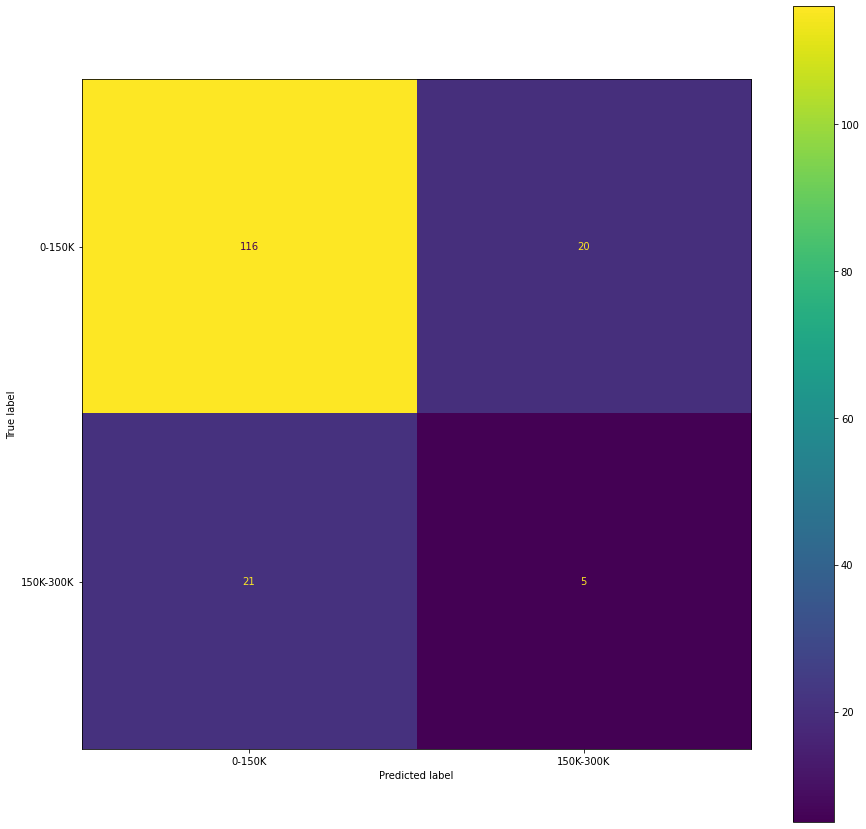

In [49]:
model_run_classification('cvec',cv, 'knn')

### METRICS ###


{'model': 'knn',
 'vectorizer': 'tvec',
 'train': 0.8247422680412371,
 'test': 0.7469135802469136,
 'MSE': 0.5030769521187454,
 'accuracy': 0.7469135802469136}

Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=3))])

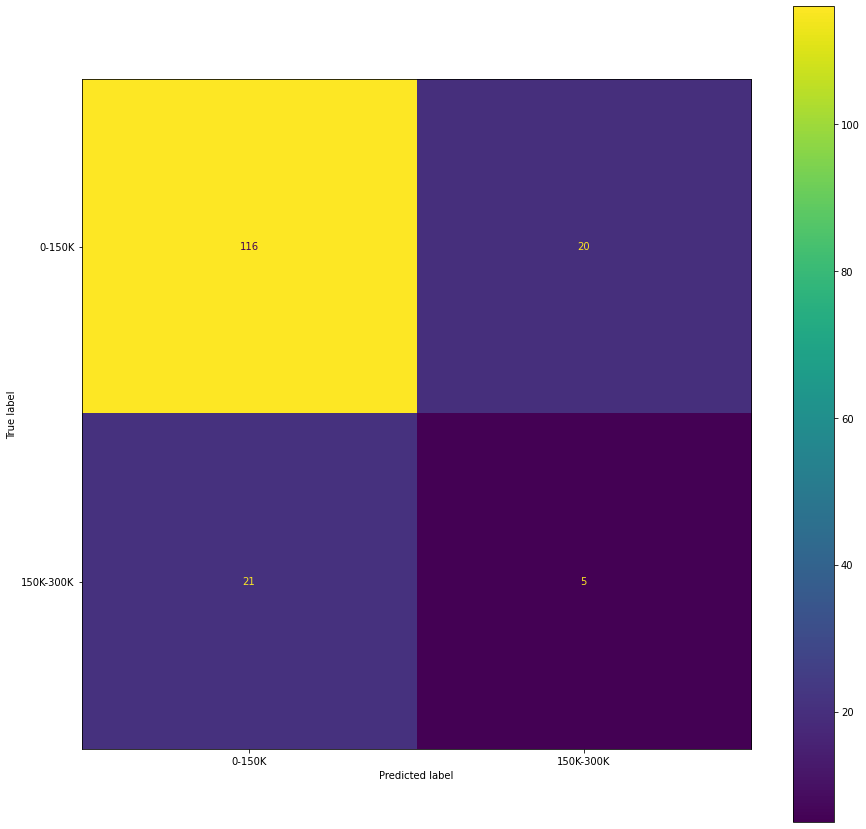

In [50]:
model_run_classification('tvec',cv, 'knn')

### METRICS ###


{'model': 'rfc',
 'vectorizer': 'cvec',
 'train': 0.9298969072164949,
 'test': 0.7839506172839507,
 'MSE': 0.4648111258522642,
 'accuracy': 0.7839506172839507}

Pipeline(steps=[('rfc', RandomForestClassifier(random_state=42))])

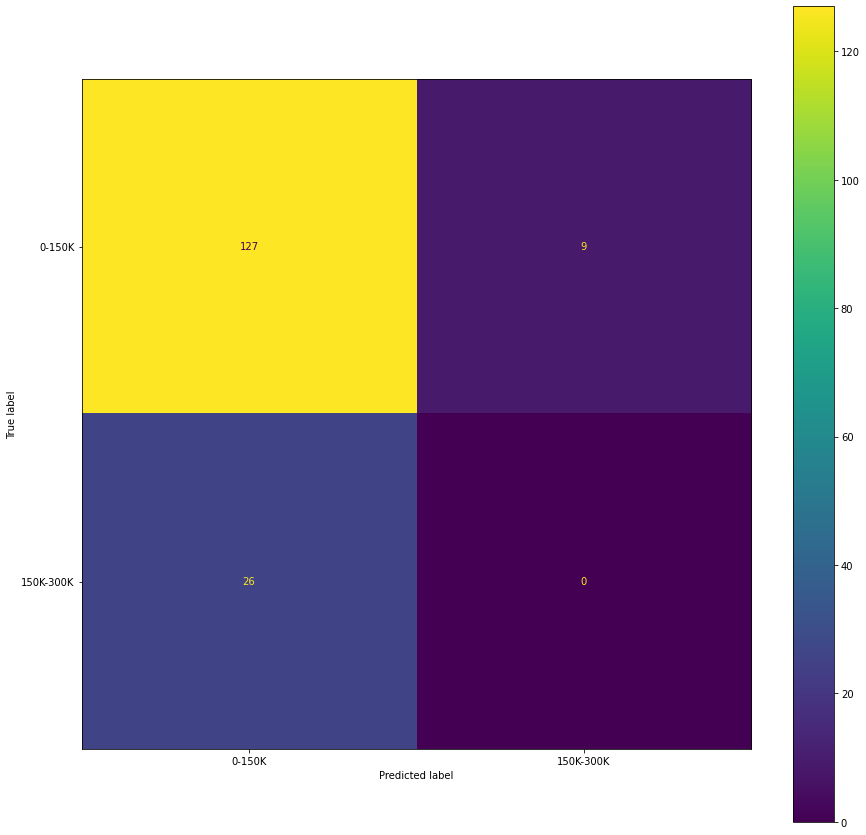

In [51]:
model_run_classification('cvec',cv, 'rfc')

### METRICS ###


{'model': 'rfc',
 'vectorizer': 'tvec',
 'train': 0.9298969072164949,
 'test': 0.7839506172839507,
 'MSE': 0.4648111258522642,
 'accuracy': 0.7839506172839507}

Pipeline(steps=[('rfc', RandomForestClassifier(random_state=42))])

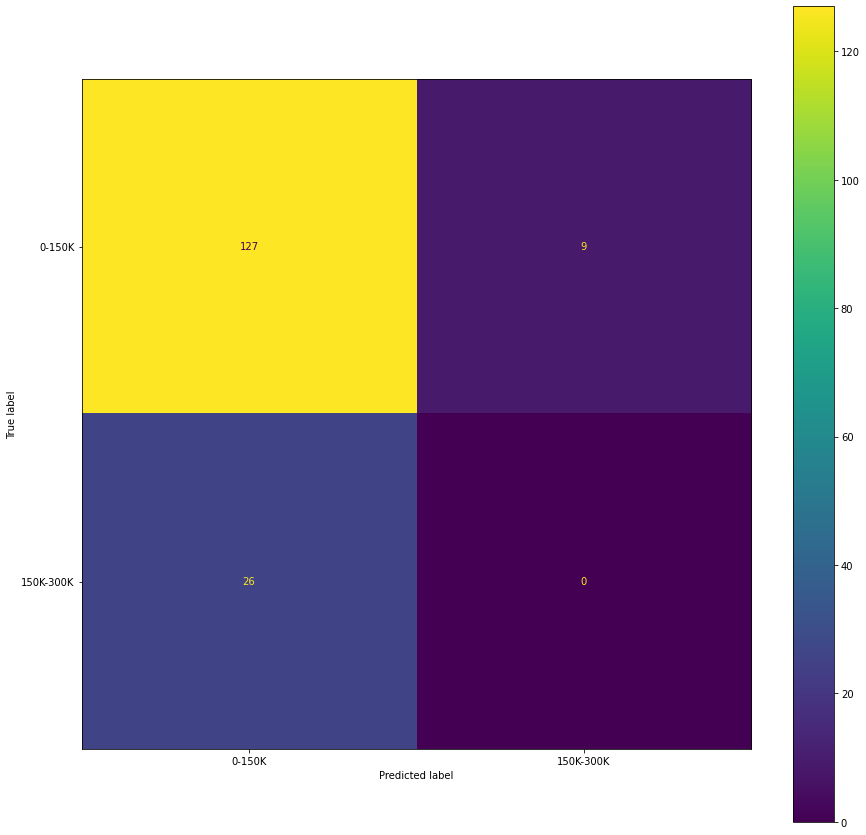

In [52]:
model_run_classification('tvec',cv, 'rfc')

### METRICS ###


{'model': 'gbc',
 'vectorizer': 'cvec',
 'train': 0.9257731958762887,
 'test': 0.7654320987654321,
 'MSE': 0.4843221048378526,
 'accuracy': 0.7654320987654321}

Pipeline(steps=[('gbc', GradientBoostingClassifier(random_state=42))])

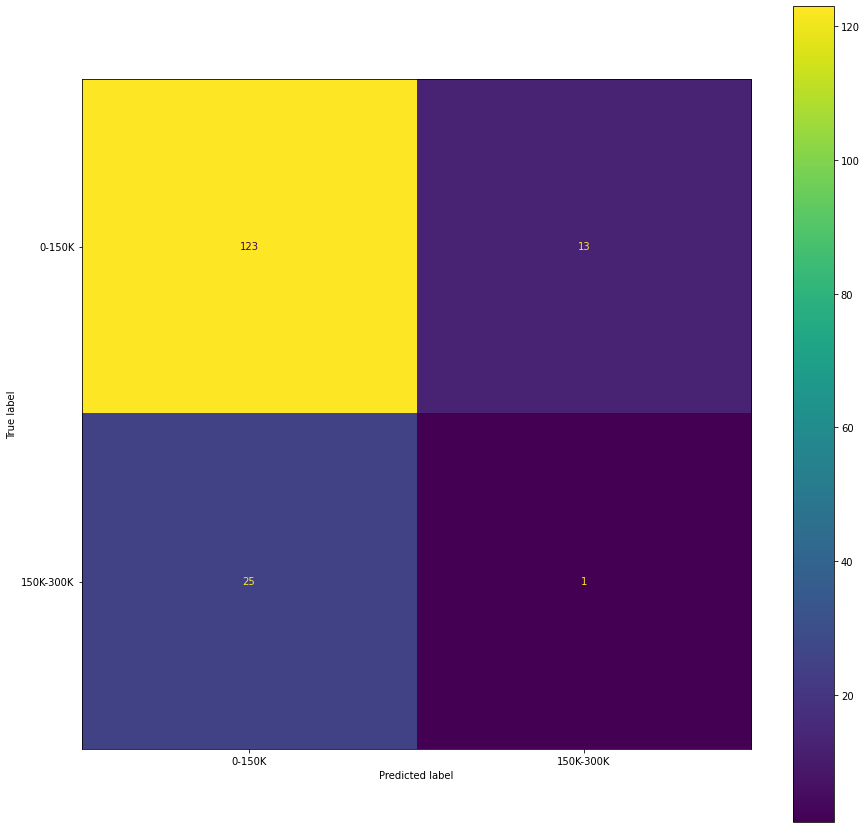

In [53]:
model_run_classification('cvec',cv, 'gbc')

### METRICS ###


{'model': 'gbc',
 'vectorizer': 'tvec',
 'train': 0.9257731958762887,
 'test': 0.7654320987654321,
 'MSE': 0.4843221048378526,
 'accuracy': 0.7654320987654321}

Pipeline(steps=[('gbc', GradientBoostingClassifier(random_state=42))])

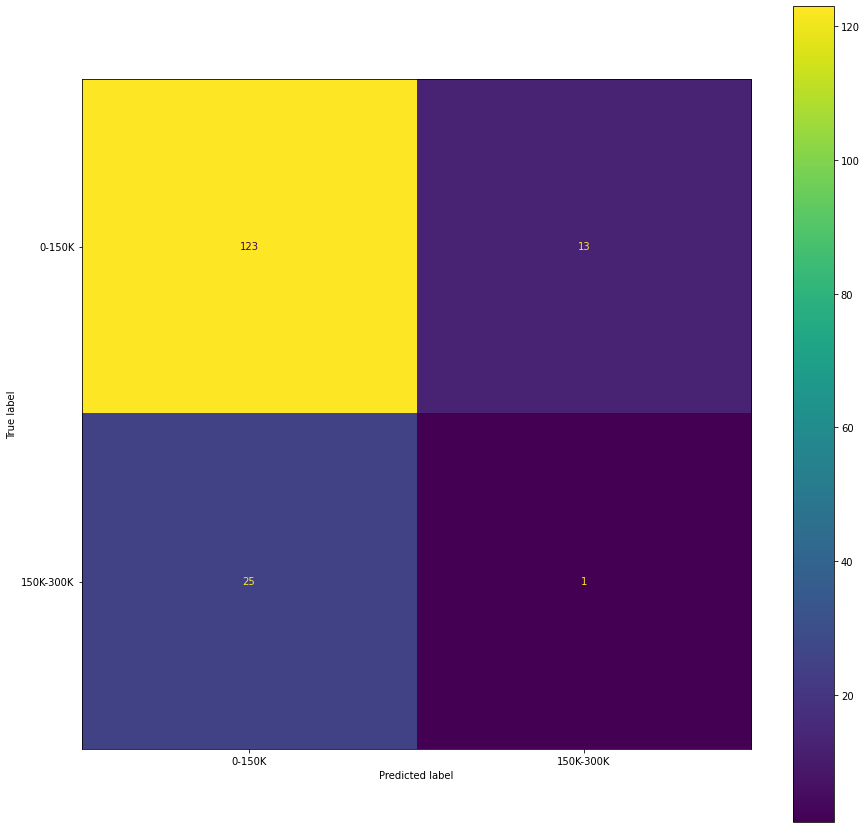

In [54]:
model_run_classification('tvec',cv, 'gbc')

### METRICS ###


{'model': 'etc',
 'vectorizer': 'cvec',
 'train': 0.9298969072164949,
 'test': 0.7962962962962963,
 'MSE': 0.45133546692422,
 'accuracy': 0.7962962962962963}

Pipeline(steps=[('etc', ExtraTreesClassifier(random_state=42))])

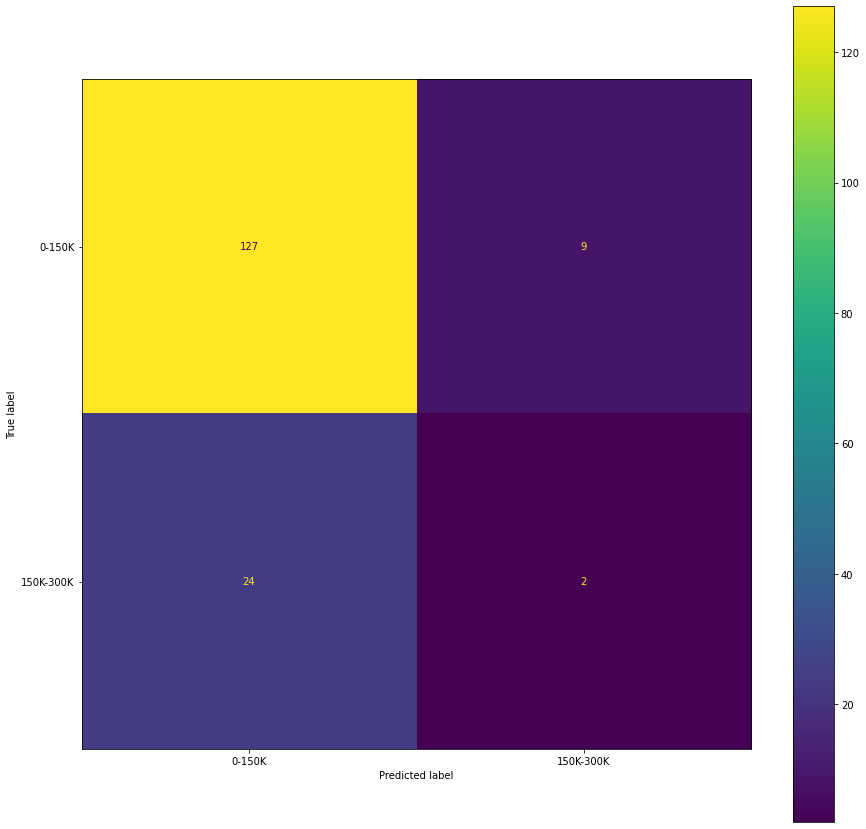

In [55]:
model_run_classification('cvec',cv, 'etc')

### METRICS ###


{'model': 'etc',
 'vectorizer': 'tvec',
 'train': 0.9298969072164949,
 'test': 0.7962962962962963,
 'MSE': 0.45133546692422,
 'accuracy': 0.7962962962962963}

Pipeline(steps=[('etc', ExtraTreesClassifier(random_state=42))])

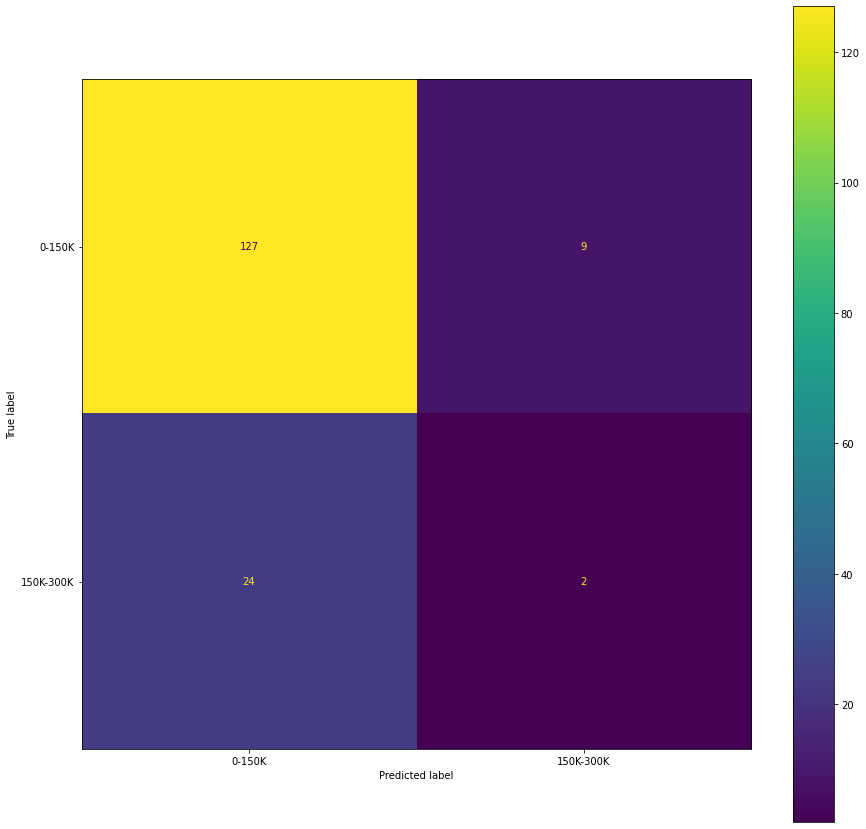

In [56]:
model_run_classification('tvec',cv, 'etc')

### METRICS ###


{'model': 'etc',
 'vectorizer': 'cvec',
 'train': 0.9298969072164949,
 'test': 0.7962962962962963,
 'MSE': 0.45133546692422,
 'accuracy': 0.7962962962962963}

Pipeline(steps=[('etc', ExtraTreesClassifier(random_state=42))])

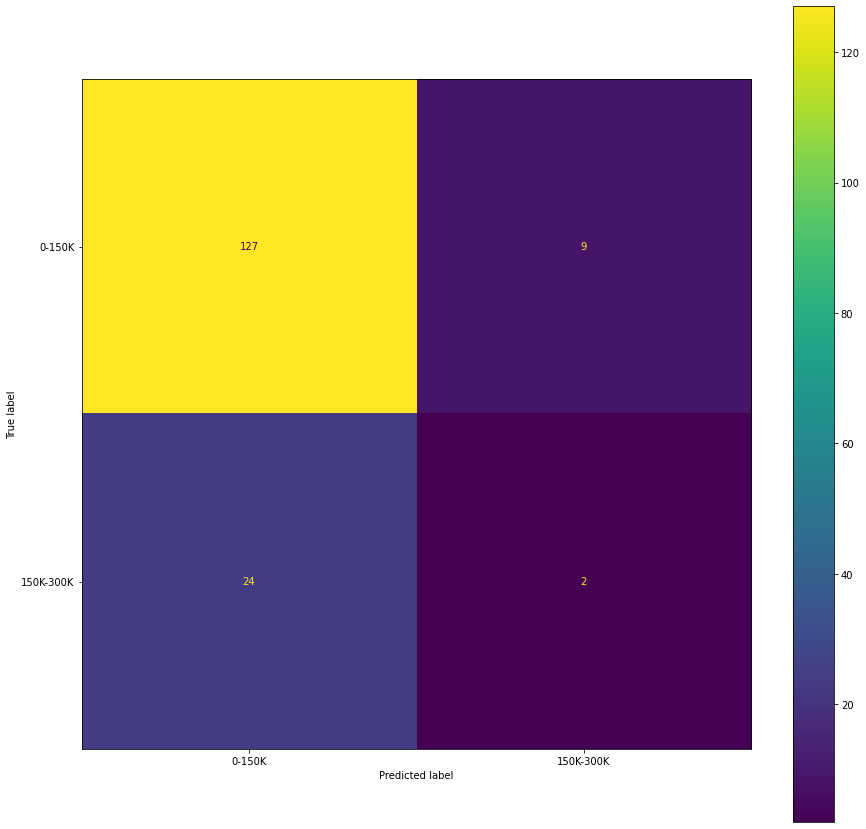

In [57]:
model_run_classification('cvec',cv, 'etc')

### METRICS ###


{'model': 'adac',
 'vectorizer': 'tvec',
 'train': 0.9010309278350516,
 'test': 0.7469135802469136,
 'MSE': 0.5030769521187454,
 'accuracy': 0.7469135802469136}

Pipeline(steps=[('adac', AdaBoostClassifier(random_state=42))])

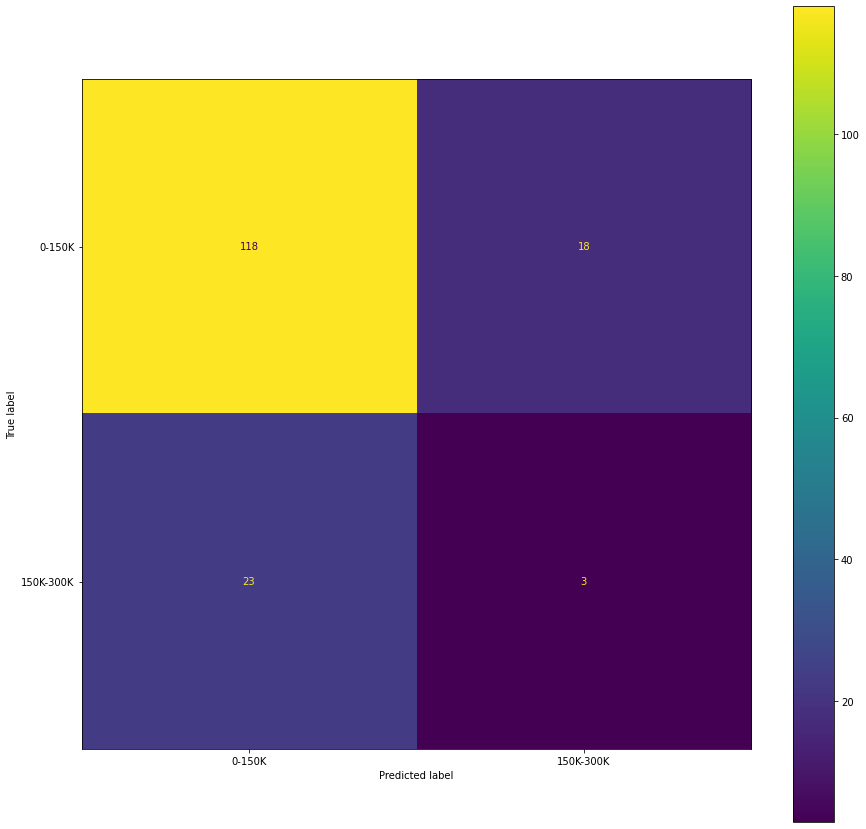

In [58]:
model_run_classification('tvec',cv, 'adac')

### METRICS ###


{'model': 'adac',
 'vectorizer': 'cvec',
 'train': 0.9010309278350516,
 'test': 0.7469135802469136,
 'MSE': 0.5030769521187454,
 'accuracy': 0.7469135802469136}

Pipeline(steps=[('adac', AdaBoostClassifier(random_state=42))])

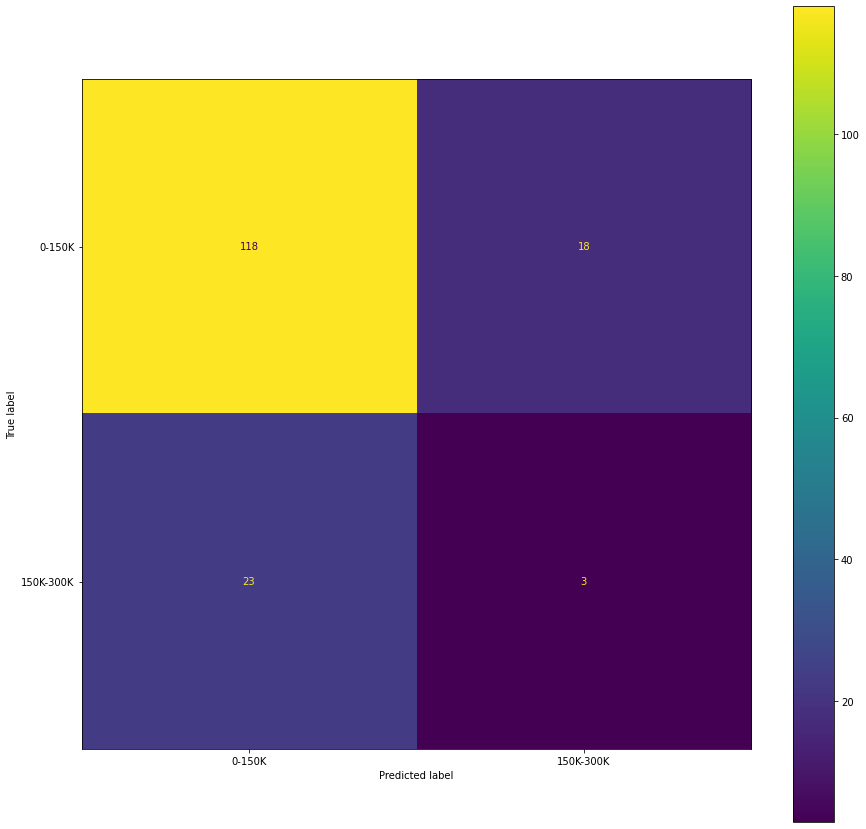

In [59]:
model_run_classification('cvec',cv, 'adac')

### METRICS ###


{'model': 'svc',
 'vectorizer': 'tvec',
 'train': 0.8020618556701031,
 'test': 0.8271604938271605,
 'MSE': 0.41573970964154905,
 'accuracy': 0.8271604938271605}

Pipeline(steps=[('svc', SVC())])

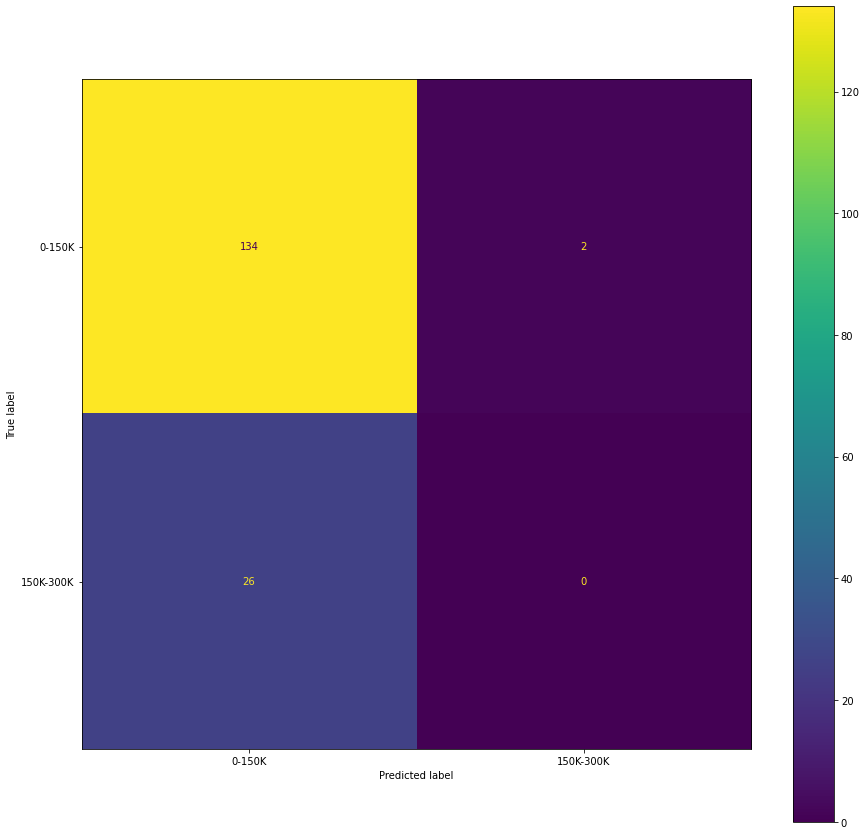

In [60]:
model_run_classification('tvec',cv, 'svc')

### METRICS ###


{'model': 'svc',
 'vectorizer': 'cvec',
 'train': 0.8020618556701031,
 'test': 0.8271604938271605,
 'MSE': 0.41573970964154905,
 'accuracy': 0.8271604938271605}

Pipeline(steps=[('svc', SVC())])

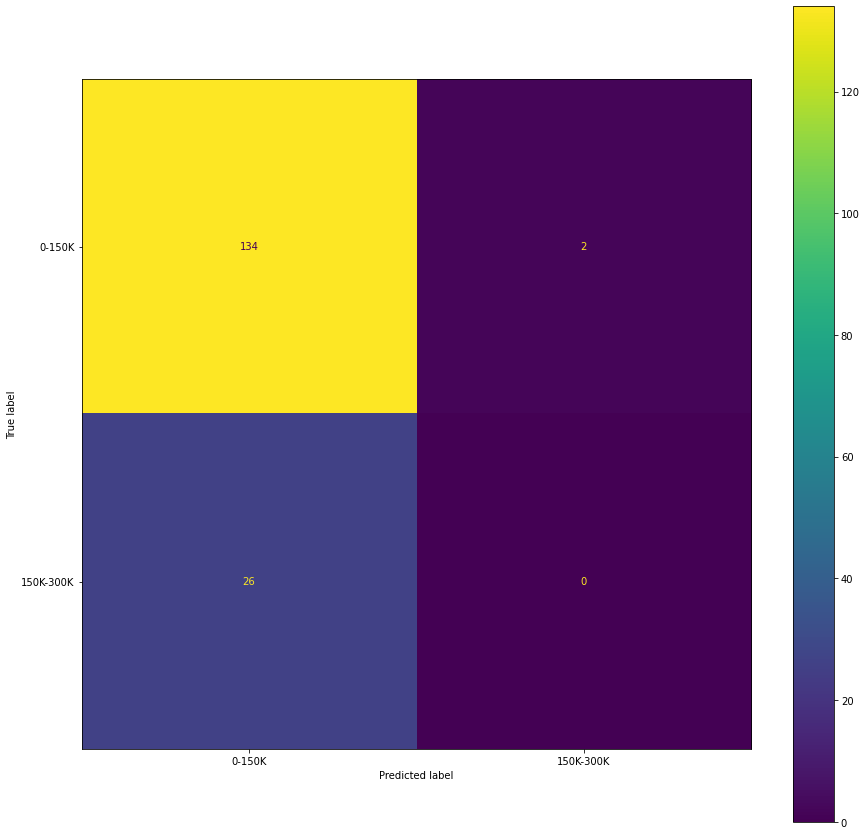

In [61]:
model_run_classification('cvec',cv, 'svc')

In [62]:
pd.DataFrame(eval_list_c)

,model,vectorizer,train,test,MSE,accuracy
0,knn,cvec,0.824742,0.746914,0.503077,0.746914
1,knn,tvec,0.824742,0.746914,0.503077,0.746914
2,rfc,cvec,0.929897,0.783951,0.464811,0.783951
3,rfc,tvec,0.929897,0.783951,0.464811,0.783951
4,gbc,cvec,0.925773,0.765432,0.484322,0.765432
5,gbc,tvec,0.925773,0.765432,0.484322,0.765432
6,etc,cvec,0.929897,0.796296,0.451335,0.796296
7,etc,tvec,0.929897,0.796296,0.451335,0.796296
8,etc,cvec,0.929897,0.796296,0.451335,0.796296
9,adac,tvec,0.901031,0.746914,0.503077,0.746914


# SVC with Gridsearch

In [63]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [64]:
param_grid = {'C': [0.1,1, 10, 100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['linear','rbf', 'poly', 'sigmoid'],
              'class_weight':['balanced', None]}

### METRICS ###


{'model': 'svc',
 'vectorizer': 'cvec',
 'train': 0.8020618556701031,
 'test': 0.8271604938271605,
 'MSE': 0.41573970964154905,
 'accuracy': 0.8271604938271605}

Pipeline(steps=[('svc', SVC())])

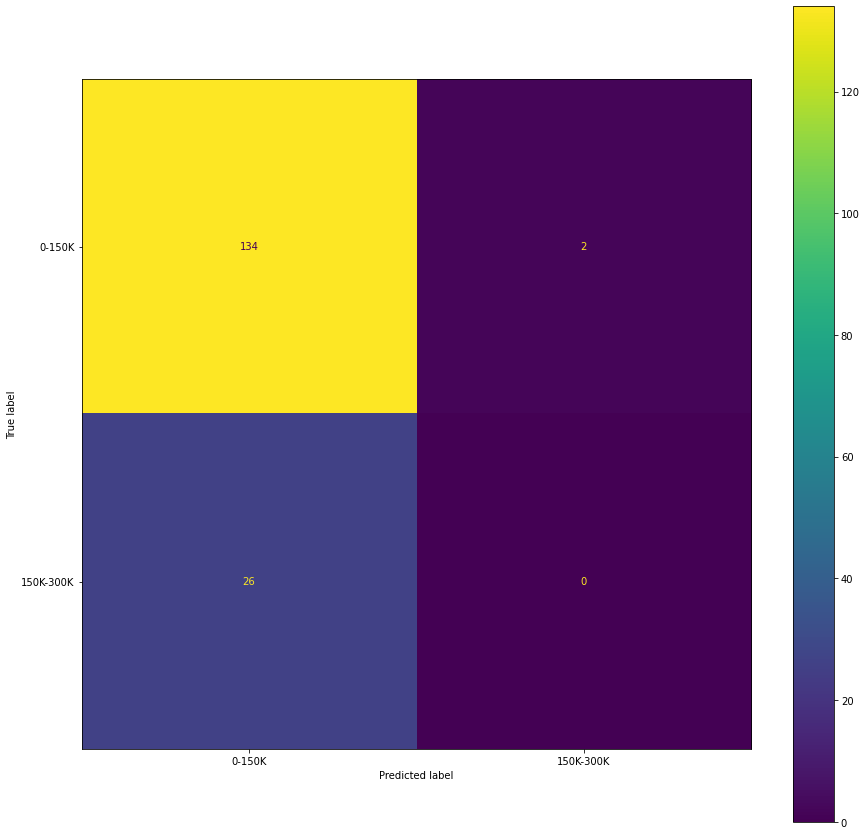

In [65]:
model_run_classification('cvec',cv, 'svc',mod_params=param_grid)

In [66]:
X_train

140     Crown Bioscience JSR Life Sciences company se...
213     global programmatic advertise platform specia...
43      The Opportunity Eversight recognize leader pr...
42      ArsenalBio s mission develop efficacious safe...
73      As Data Intelligence department Data Analyst ...
                             ...                        
71      Description Are passionate customer success C...
106     Job Summary AllianceBernstein s Request Propo...
270     Careers UL Data Scientist Northbrook Illinois...
436     Introduction As Data Scientist IBM help trans...
102     Responsible ongoing support exist Data manage...
Name: requirements_lem, Length: 485, dtype: object

In [67]:
cvec=CountVectorizer(stop_words=custom_stopwords)

In [68]:
X_train_cvec =cvec.fit_transform(X_train)
X_test_cvec = cvec.transform(X_test)

In [69]:
import pickle
# Saving tvec model to disk
pickle.dump(cvec, open('cvec.pkl','wb'))

In [70]:
X_train_cvec

<485x7417 sparse matrix of type '<class 'numpy.int64'>'
	with 96870 stored elements in Compressed Sparse Row format>

In [71]:
X_test_cvec

<162x7417 sparse matrix of type '<class 'numpy.int64'>'
	with 32122 stored elements in Compressed Sparse Row format>

In [72]:
X_train_df=pd.DataFrame(X_train_cvec.todense(),columns=cvec.get_feature_names())
X_test_df=pd.DataFrame(X_test_cvec.todense(),columns=cvec.get_feature_names())

In [73]:
rf=RandomForestRegressor(random_state=42)

In [74]:
rf.fit(X_train_df,y_train)

RandomForestRegressor(random_state=42)

In [75]:
rf_preds=rf.predict(X_test_df)

In [76]:
rf.score(X_train_df,y_train)

0.6766186367317064

In [77]:
rf.score(X_test_df,y_test)

-0.4380919814023123

In [78]:
MSE=mean_squared_error(y_test, rf_preds, squared=False)
MSE

0.31143741463267544

In [79]:
fitted_cvdf=cvec.fit(X_train)

In [80]:
cvdf_transformed=fitted_cvdf.transform(X_train)

In [81]:
model_final=rf.fit(cvdf_transformed,y_train)

In [82]:
description='experienced with data science and machine learning'

In [83]:
a=np.exp(model_final.predict(fitted_cvdf.transform([description]))) *1000

In [84]:
a

array([109447.0453071])

lis = []
for i,j in zip(lr.coef_,X_train_df.columns):
    dic = {}
    dic['coef'] = i
    lis.append(dic)
lr_coef_df=pd.DataFrame(lis).set_index(X_train_df.columns).sort_values('coef',ascending=False)

lr_coef_15=pd.concat([lr_coef_df.tail(15),lr_coef_df.head(15)]).sort_values('coef',ascending=False)
lr_coef_15

In [85]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       0.00000000e+00, 3.57111912e-07, 0.00000000e+00])

In [86]:
lis = []
for i,j in zip(rf.feature_importances_,X_train_df.columns):
    dic = {}
    dic['coef'] = i
    lis.append(dic)
rf_coef_df=pd.DataFrame(lis).set_index(X_train_df.columns).sort_values('coef',ascending=False)

In [87]:
rf_coef_15=pd.concat([rf_coef_df.tail(30),rf_coef_df.head(30)]).sort_values('coef',ascending=False)
rf_coef_15

,coef
discrimination,3.766623e-02
conferences,1.954454e-02
msc,1.888053e-02
dataset,1.322823e-02
tez,1.223453e-02
leaders,1.190330e-02
usc,1.095070e-02
ngs,9.855002e-03
address,8.986378e-03
ameritas,8.740133e-03


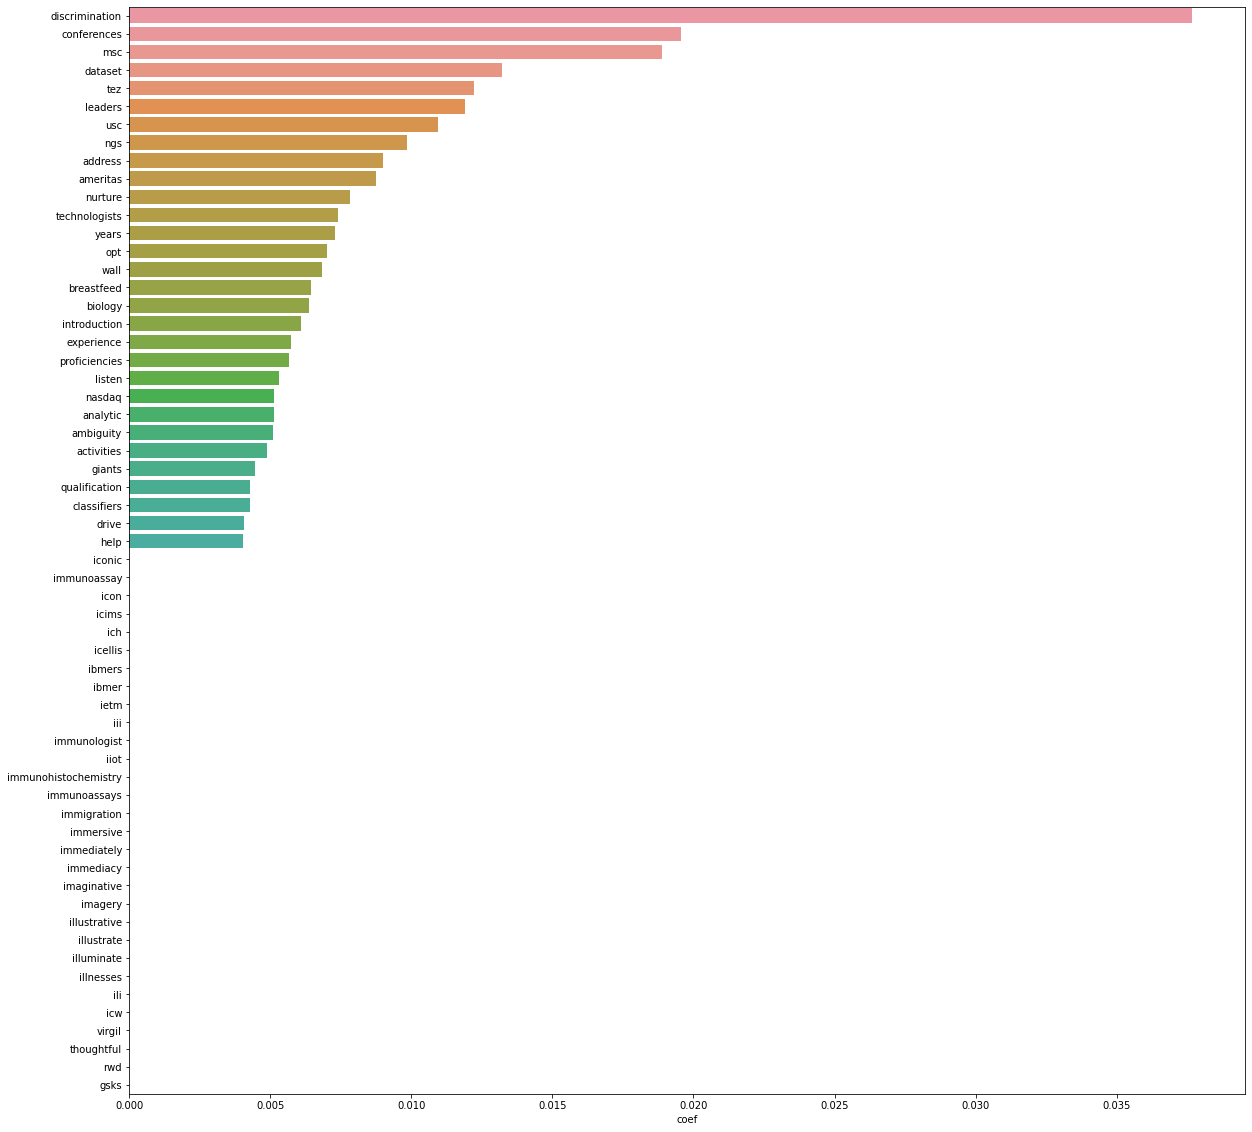

In [88]:
plt.figure(figsize=(20,20))
sns.barplot(rf_coef_15['coef'],rf_coef_15.index);

In [89]:
import pickle
import requests
import json

In [90]:
# Saving tfidf and lr model to disk
pickle.dump(fitted_cvdf, open('fitted_cvdf.pkl','wb'))
pickle.dump(model_final, open('model.pkl','wb'))

In [91]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

# Word2Vec

In [92]:
from gensim.models import Word2Vec
import nltk

In [93]:
def clean_word(job_descriptions):
    jd_data=[]
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    stopwords_list = stopwords.words('english')
    stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    stopwords_list += ['www','http','com','llc','non','pm','am','eg','e','g','ie','i']
    
    for jd in job_descriptions:
        jd_tokens_raw = nltk.regexp_tokenize(jd, pattern)
        jd_tokens=[word.lower() for word in jd_tokens_raw]
        jd_words_stopped = [word for word in jd_tokens if word not in stopwords_list]
        jd_data.append(jd_words_stopped)

    return pd.Series(jd_data) # Turn list of lists to series of lists to use in Word2Vec

In [94]:
X_cleaned=clean_word(X_train)

In [95]:
y

0      5.036953
1      5.036953
2      5.036953
3      5.036953
4      5.036953
         ...   
643    4.912655
644    4.912655
645    4.912655
646    4.912655
647    4.912655
Name: log_avg_salary, Length: 647, dtype: float64

In [96]:
len(X_train)

485

In [97]:
len(X_cleaned)

485

In [98]:
w2v_model1 = Word2Vec(X_cleaned,
                window=10,
                min_count=4, #min frequency appeared in the corpus
                workers=4)

In [99]:
w2v_model1.train(X,total_examples=w2v_model1.corpus_count, epochs=10)

(3077610, 16350460)

In [100]:
wv = w2v_model1.wv

In [101]:
wv

In [102]:
#print('Vocabulary size:%d' % len(wv))

In [103]:
wv.most_similar('model')

[('algorithms', 0.9971545934677124),
 ('predictive', 0.9951318502426147),
 ('mine', 0.9934642910957336),
 ('methods', 0.992043137550354),
 ('techniques', 0.9911762475967407),
 ('analysis', 0.985263466835022),
 ('use', 0.9816413521766663),
 ('statistical', 0.9777461886405945),
 ('contemporary', 0.9743627905845642),
 ('structure', 0.9721869230270386)]

In [104]:
#wrap into a dictionary to use in the pipeline
w2v = dict(zip(w2v_model1.wv.index2word, w2v_model1.wv.vectors))

In [105]:
len(w2v.values())

3472

In [106]:
#Averaging word vectors for all words in a text.

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.values())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

## Use Word2Vec in the pipeline

In [107]:
#Import libraries
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import time
import nltk
from nltk.corpus import stopwords

#NLP
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *
import string, re
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

#Deep learning
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding
from tensorflow.keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.layers import Conv1D, Conv2D
from tensorflow.keras.layers import MaxPooling1D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier #to use Keras in sklearn

#Deep Learning - Mixed inputs
#from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import concatenate
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.optimizers import Adam

#Save Model
import pickle

import matplotlib.pyplot as plt

from pprint import pprint
from time import time
import logging

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(0)

from pprint import pprint
from time import time
import logging

In [108]:
#Use pipeline 

rf =  Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
              ('Random Forest', RandomForestRegressor())])

sgd = Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
               ('Stochastic Gradient Descent', SGDClassifier(alpha=0.001, n_jobs=3))])

svr = Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
              ('SVR-lin', SVR())])
                
lr = Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
              ('Linear Regression', LinearRegression(n_jobs=3))])

In [109]:
models = [('Random Forest', rf),
          ('Support Vector Regressor', svr),
          ('Linear Regression', lr)]

In [110]:
scores = [(name, cross_val_score(model, X_cleaned, y_train, cv=2).mean()) for name, model, in models]

In [111]:
scores

[('Random Forest', -0.14611052987052164),
 ('Support Vector Regressor', 0.0012080040278672488),
 ('Linear Regression', -0.9161307493874807)]

In [112]:
#for word 2 vec, random forest performs the best but still lower than using linear regression with tvec as shown previously.

# Deep Learning Models with Word Embeddings

In [113]:
from keras_preprocessing import text

In [114]:
from keras_preprocessing.sequence import pad_sequences

In [115]:
from keras.utils import np_utils

In [116]:
tokenizer = text.Tokenizer()
tokenizer.num_words = 1000  #limit the number of words to keep most common 1000 words
tokenizer.fit_on_texts(list(job['requirements_lem']))
list_tokenized_jd = tokenizer.texts_to_sequences(job['requirements_lem'])

X_t = pad_sequences(list_tokenized_jd, maxlen=400, padding = 'post') 

In [117]:
#Encoding to categorical classes
y_cat_dl = to_categorical(y_cat.values, num_classes=6, dtype="float32")

In [118]:
y_cat_dl

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [119]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_t, y_cat_dl, test_size=0.2, random_state=4)

# Create Base Model

In [120]:
model = Sequential()

embedding_size = 64  #each word onto a 32 length real valued vector
model.add(Embedding(input_dim = 1000, output_dim = embedding_size, input_length = 400)) #try 100, 200, single LSTM and single dense 100
model.add(LSTM(100))
#model.add(LSTM(64))
#model.add(GlobalMaxPool1D())
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Flatten())   #add Flatten layer 
model.add(Dense(6, activation='softmax'))

In [121]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 64)           64000     
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 16)                1616      
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 102       
                                                                 
Total params: 131,718
Trainable params: 131,718
Non-trai

In [122]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [123]:
history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=[X_test, y_test])

Epoch 1/20
11/11 [==============================] - 5s 348ms/step - loss: 1.6463 - accuracy: 0.6925 - val_loss: 0.9945 - val_accuracy: 0.8077
Epoch 2/20
11/11 [==============================] - 3s 307ms/step - loss: 0.7615 - accuracy: 0.7950 - val_loss: 0.5808 - val_accuracy: 0.8077
Epoch 3/20
11/11 [==============================] - 3s 315ms/step - loss: 0.5617 - accuracy: 0.7892 - val_loss: 0.5189 - val_accuracy: 0.8077
Epoch 4/20
11/11 [==============================] - 3s 316ms/step - loss: 0.5552 - accuracy: 0.7834 - val_loss: 0.4969 - val_accuracy: 0.8077
Epoch 5/20
11/11 [==============================] - 4s 323ms/step - loss: 0.5316 - accuracy: 0.7950 - val_loss: 0.4936 - val_accuracy: 0.8077
Epoch 6/20
11/11 [==============================] - 3s 312ms/step - loss: 0.5298 - accuracy: 0.7950 - val_loss: 0.4938 - val_accuracy: 0.8077
Epoch 7/20
11/11 [==============================] - 3s 314ms/step - loss: 0.5230 - accuracy: 0.7950 - val_loss: 0.4915 - val_accuracy: 0.8077
Epoch 

Train: 0.795, Test: 0.808


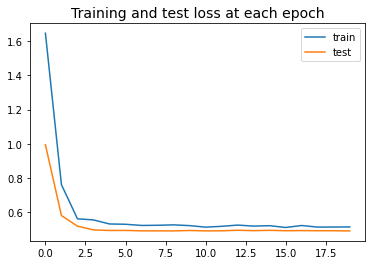

In [124]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Training and test loss at each epoch', fontsize=14)
plt.legend()
plt.show()

Train: 0.795, Test: 0.808


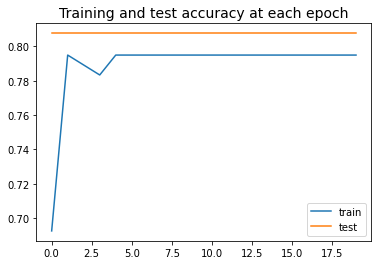

In [125]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Training and test accuracy at each epoch', fontsize=14)
plt.legend()
plt.show()

# Using Pycaret

In [126]:
#!pip install pycaret

In [127]:
#pip install sklearn

In [147]:
num_c=['Salary_Bins','Salary_Bins_binary','job_title_simp2','short_title','Revenue','Company Name','Location','Headquarters','Size','Type of ownership','Industry','Sector']
job[num_c]=job[num_c].astype('category')

In [148]:
interest_col=['Industry','job_title_simp2','requirements_lem','Revenue']
X_py=job[interest_col]
y_py=job['Salary_Bins_binary']

In [149]:
X_train_p,X_test_p,y_train_p,y_test_p = train_test_split(X_py,y_py,
                                                 random_state=42, test_size=0.25) # account for slight class unbalanced 

In [150]:
job_py=pd.concat([X_train_p,y_train_p],axis=1)
job_py_test=pd.concat([X_test_p,y_test_p],axis=1)

In [151]:
job_py

,Industry,job_title_simp2,requirements_lem,Revenue,Salary_Bins_binary
140,6.0,4.0,Crown Bioscience JSR Life Sciences company se...,9.0,0
213,32.0,4.0,global programmatic advertise platform specia...,4.0,0
43,18.0,4.0,The Opportunity Eversight recognize leader pr...,2.0,0
42,6.0,4.0,ArsenalBio s mission develop efficacious safe...,13.0,0
73,30.0,4.0,As Data Intelligence department Data Analyst ...,4.0,0
...,...,...,...,...,...
71,29.0,4.0,Description Are passionate customer success C...,3.0,0
106,33.0,4.0,Job Summary AllianceBernstein s Request Propo...,5.0,0
270,12.0,4.0,Careers UL Data Scientist Northbrook Illinois...,5.0,0
436,28.0,4.0,Introduction As Data Scientist IBM help trans...,3.0,0


In [152]:
job_py.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 140 to 102
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Industry            485 non-null    category
 1   job_title_simp2     485 non-null    category
 2   requirements_lem    485 non-null    object  
 3   Revenue             485 non-null    category
 4   Salary_Bins_binary  485 non-null    category
dtypes: category(4), object(1)
memory usage: 13.1+ KB


In [153]:
job.dtypes

avg_salary               int64
log_avg_salary         float64
same_state               int64
company_age              int64
python                   int64
excel                    int64
hadoop                   int64
spark                    int64
aws                      int64
tableau                  int64
big_data                 int64
len_requirement          int64
words_requirement        int64
Rating                 float64
Salary_Bins           category
job_title_simp2       category
short_title           category
Revenue               category
Company Name          category
Location              category
Headquarters          category
Size                  category
Type of ownership     category
Industry              category
Sector                category
requirements_lem        object
Salary_Bins_binary    category
dtype: object

In [136]:
from pycaret.classification import *

In [155]:
exp_mclf1 = setup(data = job_py, target = 'Salary_Bins_binary', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Salary_Bins_binary
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(485, 5)"
5,Missing Values,0
6,Numeric Features,0
7,Categorical Features,4
8,Ordinal Features,0
9,High Cardinality Features,0


In [156]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7729,0.5633,0.0375,0.3000,0.0667,0.0483,0.0845,0.6430
gbc,Gradient Boosting Classifier,0.7671,0.5996,0.1286,0.4867,0.1932,0.1198,0.1641,0.0400
lightgbm,Light Gradient Boosting Machine,0.7670,0.5447,0.0000,0.0000,0.0000,0.0000,0.0000,0.0390
dummy,Dummy Classifier,0.7670,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0070
rf,Random Forest Classifier,0.7583,0.5233,0.1286,0.4810,0.1911,0.1065,0.1468,0.0620
ada,Ada Boost Classifier,0.7579,0.5866,0.0875,0.4667,0.1410,0.0718,0.1213,0.0300
et,Extra Trees Classifier,0.7553,0.5501,0.1286,0.4710,0.1885,0.1011,0.1401,0.0640
lda,Linear Discriminant Analysis,0.7495,0.5730,0.1161,0.4067,0.1730,0.0806,0.1097,0.0150
dt,Decision Tree Classifier,0.7404,0.5261,0.1286,0.3810,0.1749,0.0726,0.0977,0.0100
ridge,Ridge Classifier,0.7374,0.0000,0.1286,0.3043,0.1712,0.0645,0.0739,0.0080


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
#create model
gbc = create_model('lr')

In [140]:
#trained model object is stored in the variable 'dt'. 
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
predict_model(gbc);

In [ ]:
unseen_predictions = predict_model(gbc, data=job_py_test)
unseen_predictions.head()